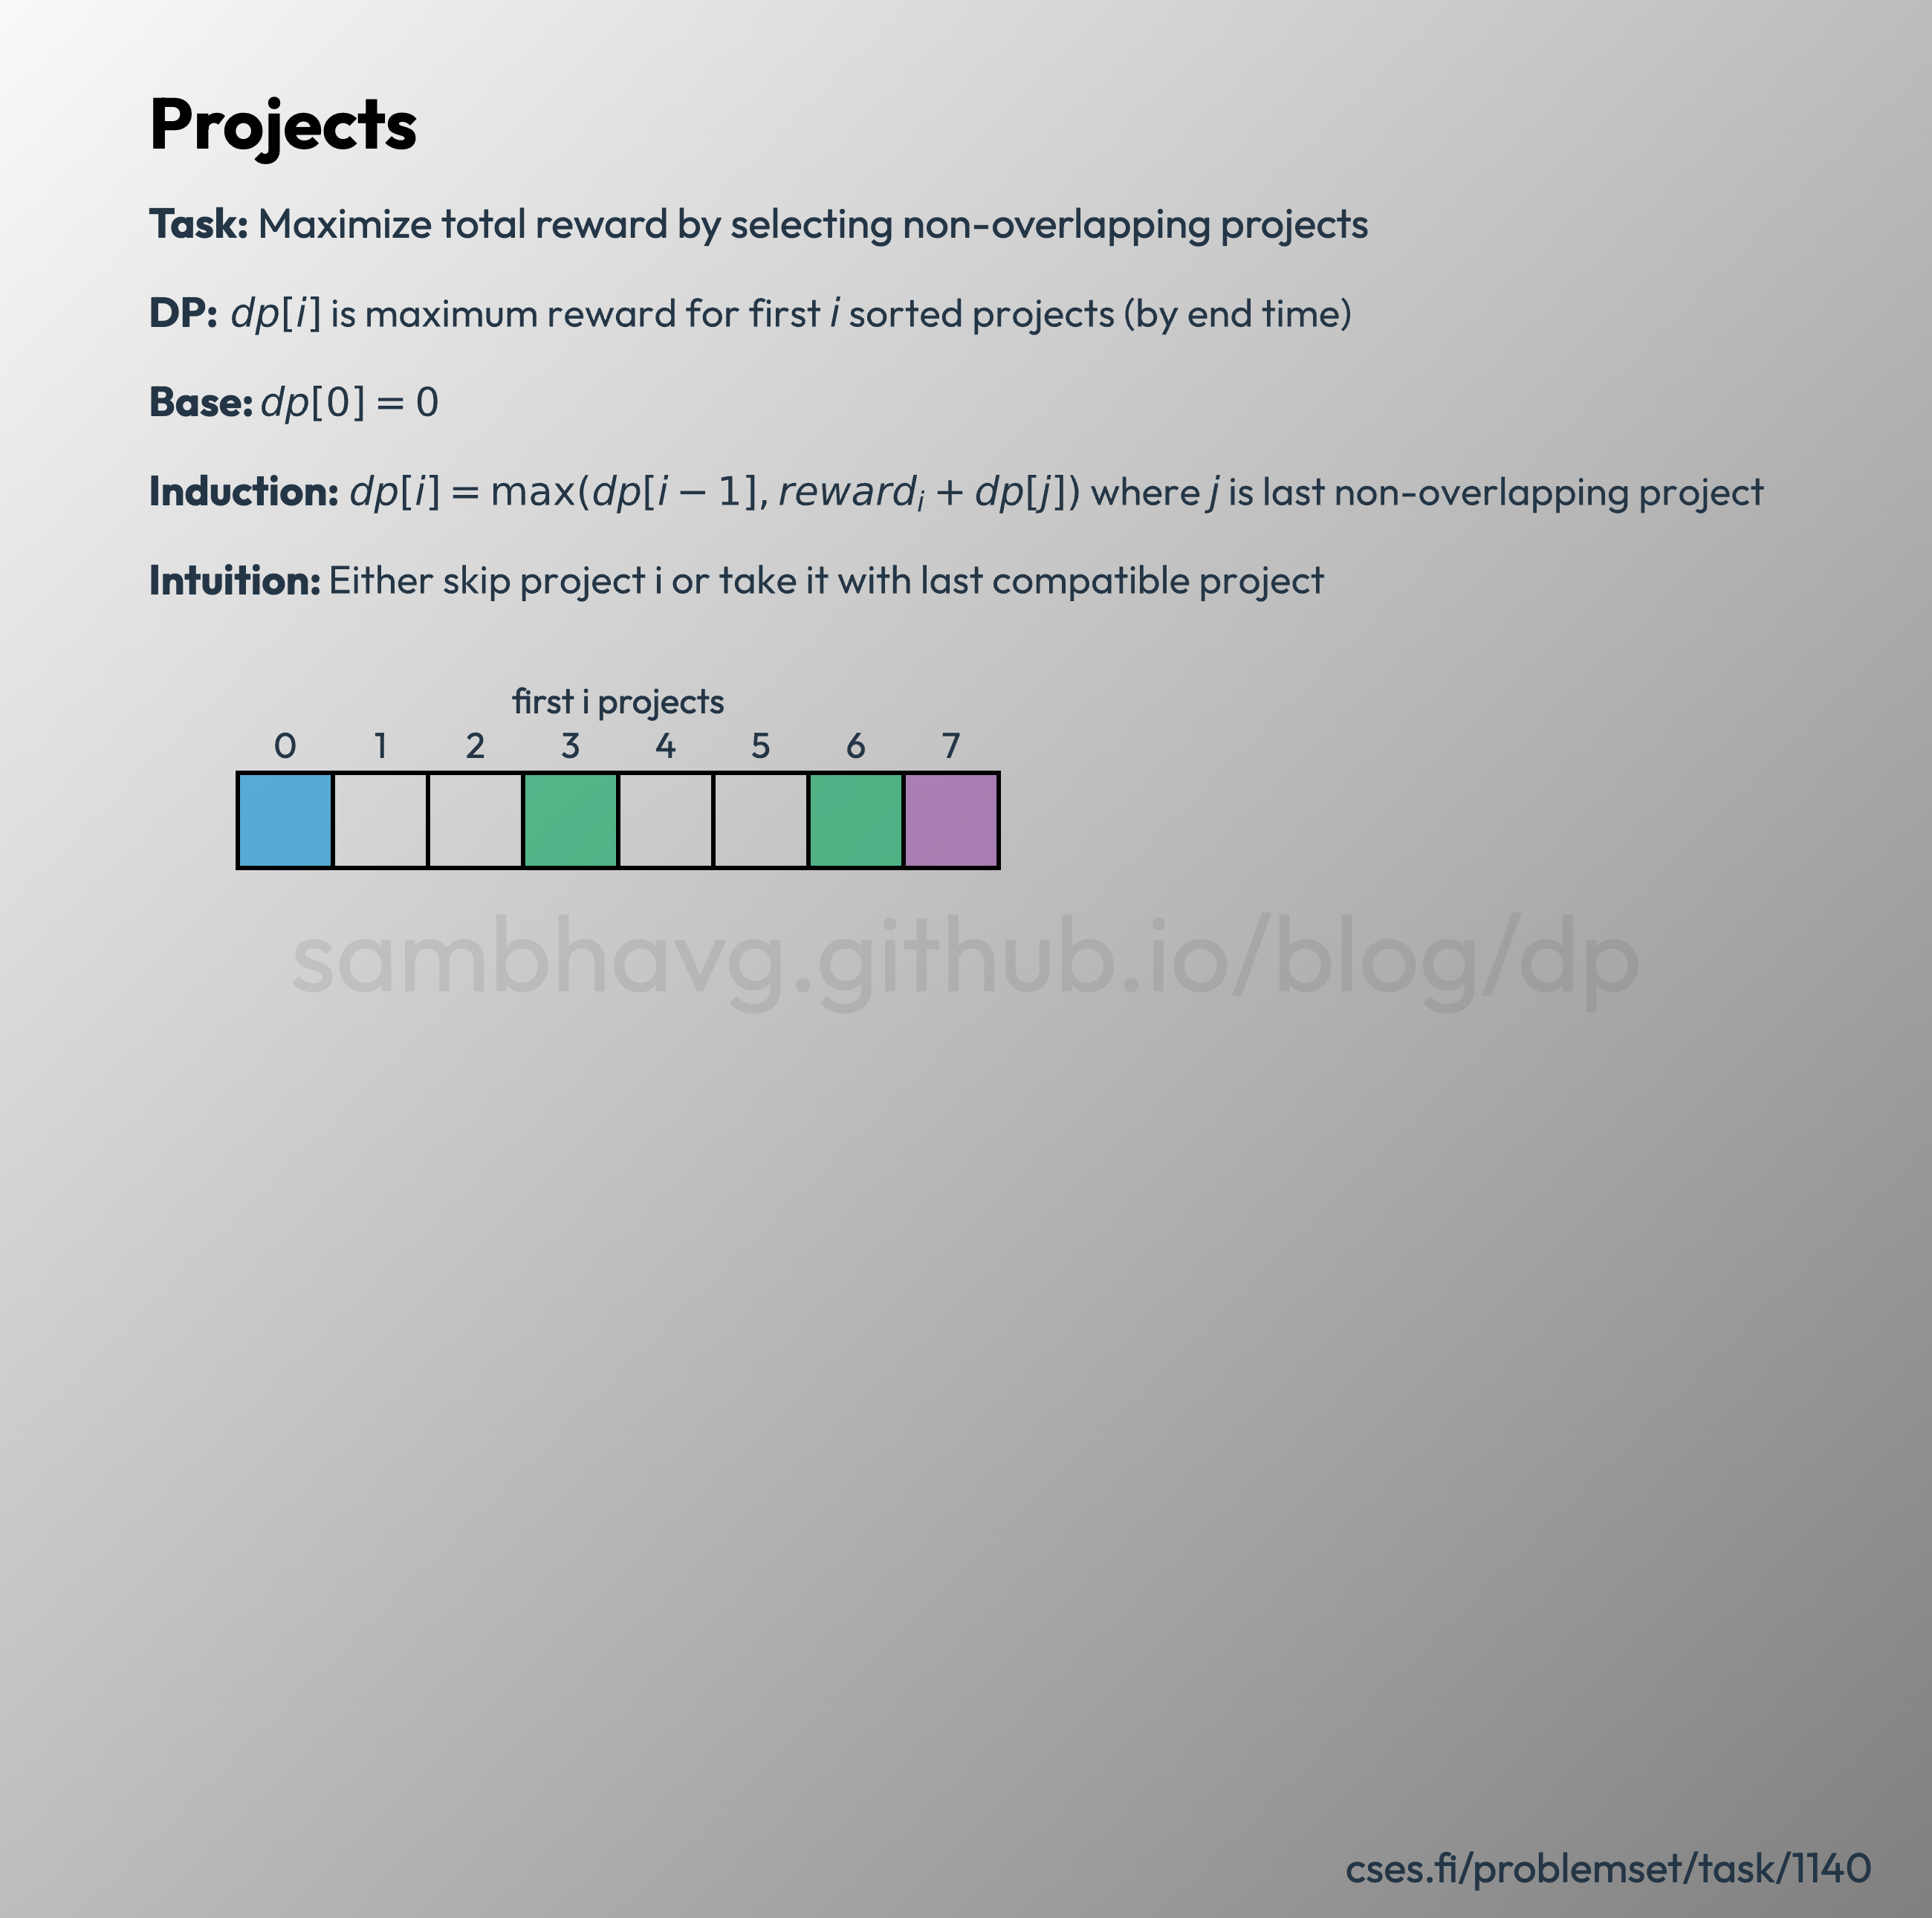

In [30]:
from IPython.display import SVG, display
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import base64
from PIL import Image
import io
import time
import os


def svg_display_to_png(svg_string, width=650, height=650):
    """
    Converts an SVG string to PNG by rendering it in a headless browser.
    This preserves exact rendering including fonts.

    Args:
        svg_string: The SVG content as a string
        width: Output width in pixels
        height: Output height in pixels

    Returns:
        PIL Image object
    """
    # Create an HTML wrapper for the SVG
    html = f"""
    <html>
    <body style="margin: 0; padding: 0;">
        {svg_string}
    </body>
    </html>
    """

    # Configure headless Chrome
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument(f"--window-size={width},{height}")

    driver = webdriver.Chrome(options=chrome_options)

    try:
        # Save HTML to a data URL and open it
        html_b64 = base64.b64encode(html.encode("utf-8")).decode("utf-8")
        driver.get(f"data:text/html;base64,{html_b64}")

        # Take screenshot
        png_data = driver.get_screenshot_as_png()

        # Convert to PIL Image
        image = Image.open(io.BytesIO(png_data))

        return image

    finally:
        # time.sleep(100)
        driver.quit()


# Example usage:
# svg files start with 01_ to 14_: get this file and convert it to png
for i in range(1, 15):
    svg_file_start = f"{i:02d}_"
    # find the svg file with this prefix
    svg_file = [f for f in os.listdir() if f.startswith(svg_file_start)][0]

    svg_output = open(svg_file, "r").read()
    image = svg_display_to_png(svg_output, width=650 * 4, height=680 * 4)
    png_name = svg_file.replace(".svg", ".png")
    image.save(f"./output/{png_name}")

# If you want to display the result in Jupyter:
display(image)